In [20]:
"""

머신러닝이란 무엇인가? 

기계학습은 인공 지능의 한 분야로 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야를 말한다.

머신러닝 순서도

0. 문제의 명확한 정의 / 머신러닝으로 풀 수 있는 문제인가? 

cf) 머신러닝은 어떻게 분류할 수 있나? -->지도학습(53~54pp),비지도학습(167~168pp),강화학습 --> 현재 지니컨설팅에서는 지도학습 문제가 대다수

1. 데이터 수집
2. 데이터 전처리 / 시각화
3. 머신러닝 모델 탐색
4. 머신러닝 모델 적용
5. 머신러닝 모델 검증
6. 머신러닝 모델 적용

머신러닝 모델링을 위해서는 무엇이 필요한가 : https://www.evernote.com/l/AfkpsXPoYEVLdoX-trBTRidEKRSvXezvGGA/4


"""

# 다음의 네 라이브러리를 import한다고 가정 #


from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# !pip install mglearn
import mglearn


In [22]:
# 대표적인 Toy problem dataset 중 하나인 Iris dataset을 Scikit-learn에서 불러옴 #

from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [23]:
print("iris_dataset key : \n{}".format(iris_dataset.keys()))
print("Target name : \n{}".format(iris_dataset['target_names']))
print("Feature name : \n{}".format(iris_dataset['feature_names']))
print("data 크기 : {}".format(iris_dataset['data'].shape))


iris_dataset key : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Target name : 
['setosa' 'versicolor' 'virginica']
Feature name : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data 크기 : (150, 4)


In [24]:

"""
머신러닝에서 데이터를 왜 훈련 데이터와 테스트 데이터로 나눌까?
--> 일반화가 되지 않는 문제 --> 55~57pp 참고 / 과대 적합~ 일반화~ 과소적합 사이의 아슬아슬한 줄다리기를 하는 사람들이 data scientist
--> 일반적으로 25%를 테스트 세트로 사용
"""

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0) # random_state 매개변수 고정 

print("X_train size : {}".format(X_train.shape))
print("y_train size : {}".format(y_train.shape))
print()
print("X_test size : {}".format(X_test.shape))
print("y_test size : {}".format(y_train.shape))


X_train size : (112, 4)
y_train size : (112,)

X_test size : (38, 4)
y_test size : (112,)


In [26]:
"""

머신러닝 모델의 설계 방법

1. 처음부터 끝까지 기본적인 파이썬 라이브러리(Numpy, Pandas)를 활용해서 밑바닥부터 설계 
2. Scikit-learn같이 이미 설계된 라이브러리의 클래스를 활용(R과 비슷한 구조) --> 해당 교재의 대부분의 모델은 Scikit-learn을 통해 구현되어 있음

Scikit-learn의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 각각 구현되어 있다.

ex) 커피는 어떻게 만들까?
라이브러리:모듈:클래스(Class):객체(Object)=스타벅스 가게:여러 종류의 커피머신:커피를 조리할 수 있는 커피머신-아메리카노,카라멜 마끼아또.. 등등등

"""

# First algorithm : kNN algorithm in Scikit-learn #

from sklearn.neighbors import KNeighborsClassifier # Scikit-learn의 Neighbors 모듈을 가져 온다. Neighbors에서 KNeighborClassifier 클래스를 불러온다. 
knn = KNeighborsClassifier(n_neighbors=1)  # 가장 가까운 것 하나

"""
knn 객체는 훈련 데이터로부터 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화한 것이다.
또한 훈련 데이터로부터 추출한 정보를 담고 있다.

"""


'\nknn 객체는 훈련 데이터로부터 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화한 것이다.\n또한 훈련 데이터로부터 추출한 정보를 담고 있다.\n\n'

In [27]:
# 훈련 데이터 셋으로부터 모델 생성 # 

knn.fit(X_train,y_train) # NumPy 배열 X_train과 y_train을 매개 변수로 #

"""
KNeighborsClassifier 클래스에서 조정할 수 있는 매개 변수들은 다음과 같다. 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
"""


"\nKNeighborsClassifier 클래스에서 조정할 수 있는 매개 변수들은 다음과 같다. \n\nKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=1, p=2,\n           weights='uniform')\n"

In [28]:
## 예측하기 ##

"""

예측 변수들(Features) : 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] : [꽃받침 길이, 꽃받침 폭, 꽃잎 길이, 꽃잎 폭]

반응 변수(Label) :['setosa' 'versicolor' 'virginica']

"""

# 새로운 Feature 투입 #
X_new = np.array([[5,2.9,1,0.2]]) # [] 가 하나 더 있는 이유 : scikit-learn은 항상 데이터가 2차원 배열일 것으로 예상하므로
print("X_new.shape : {}".format(X_new.shape))
print()

# 예측하기 #
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름:{}".format(iris_dataset['target_names'][prediction]))


X_new.shape : (1, 4)

예측: [0]
예측한 타깃의 이름:['setosa']


In [29]:

## 모델 평가하기 ##

y_pred = knn.predict(X_test)
print("predition : {}".format(y_pred))
print()

# 정확도 #

print(y_pred == y_test)
print()
print("accuracy : {}".format(np.mean(y_pred == y_test)))
print()
print("accuracy : {}".format(knn.score(X_test,y_test)))


predition : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]

accuracy : 0.9736842105263158

accuracy : 0.9736842105263158


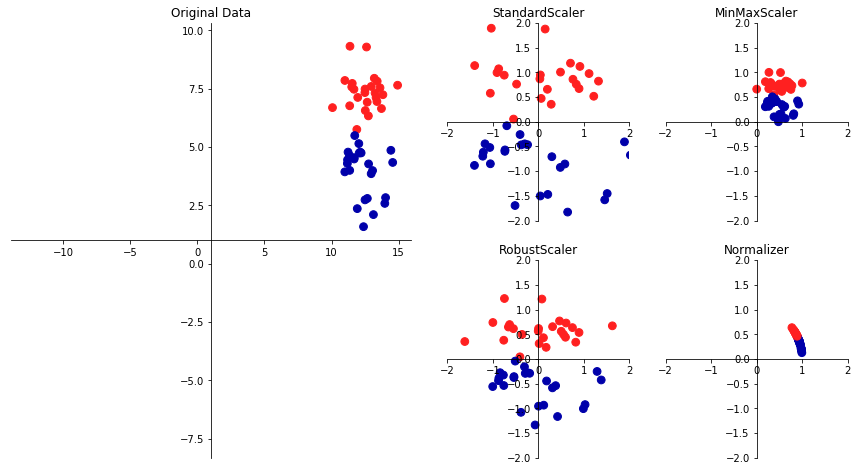

In [10]:

## 데이터 전처리와 스케일 조정 (169pp~175pp) --> Scaling이나 Standardiation은 왜 필요할까? ##

### Scaling ###

# 스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.
# 스케일링은 자료의 오버플로우(Overflow)나 언더플로우(Underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(Condition Number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다
# Underflow and Overflow 설명 : https://m.blog.naver.com/PostView.nhn?blogId=dae0park&logNo=140199615748&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F

# Scikit-Learn에서는 스케일링을 위한 함수와 클래스를 각각 제공한다. 스케일링 함수는 다음과 같다.

# scale(x) : 기본 스케일, 평균과 표준편차 사용
# robust_scale(x) : 중앙값과 IQR 사용, 아웃라이어의 영향을 최소화
# minmax_scale(x) : 최대/최소값이 각각 1,0이 되도록 스케일링
# maxabs_scale(x) : 최대절대값과 0이 각각 1,0이 되도록 스케일링

mglearn.plots.plot_scaling()


In [2]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Use breast cancer data in scikit-learn ##

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1) # default ratio of test_size : 0.25

print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print()
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))


X_train shape : (426, 30)
X_test shape : (143, 30)

y_train shape : (426,)
y_test shape : (143,)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # scaler(object of MinMaxScaler())는 fit method를 호출할 때 훈련 데이터(X_train)만 넘겨주며 y_train은 사용하지 않는다.

scaler.fit(X_train)

# 데이터 변환 #
x_train_scaled = scaler.transform(X_train) # 실제로 훈련 데이터의 스케일을 조정하려면 스케일 객체의 transform method를 사용

print("size after scaling: {}".format(x_train_scaled.shape)) 
print("Min value before scaling:\n {}".format(X_train.min(axis=0)))
print()
print("Min value before scaling:\n {}".format(X_train.min(axis=0)))
print()
print("Min value after scaling:\n {}".format(x_train_scaled.min(axis=0)))
print()
print("Max value before scaling:\n {}".format(X_train.max(axis=0)))
print()
print("Max value after scaling:\n {}".format(x_train_scaled.max(axis=0)))


size after scaling: (426, 30)

Min value before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]

Min value after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

Max value before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]

Max value after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:

#### https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ ####
#### http://scikit-learn.org/stable/modules/preprocessing.html : More Specific Description ####

import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import pandas as pd

x = (np.arange(9,dtype = np.float) - 3)
print(x)

print()
x1 = x.reshape(-1,1)
print(x1)
print()

x2 = np.vstack([x1,[20]])
print(x2)

df = pd.DataFrame(np.hstack([x1,scale(x1),robust_scale(x1),minmax_scale(x1),maxabs_scale(x1)]),
                  columns = ["x1","scale(x1)","robust_scale(x1)","minmax_scale(x1)","maxabs_scale(x1)"])

print()
print(df)


[-3. -2. -1.  0.  1.  2.  3.  4.  5.]

[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]

[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [20.]]

    x1  scale(x1)  robust_scale(x1)  minmax_scale(x1)  maxabs_scale(x1)
0 -3.0  -1.549193             -1.00             0.000              -0.6
1 -2.0  -1.161895             -0.75             0.125              -0.4
2 -1.0  -0.774597             -0.50             0.250              -0.2
3  0.0  -0.387298             -0.25             0.375               0.0
4  1.0   0.000000              0.00             0.500               0.2
5  2.0   0.387298              0.25             0.625               0.4
6  3.0   0.774597              0.50             0.750               0.6
7  4.0   1.161895              0.75             0.875               0.8
8  5.0   1.549193              1.00             1.000               1.0


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print(data1)
print()
print(data2)
print()
print("data1 mean : {}".format(np.mean(data1,axis=0)))
print("data1 std : {}".format(np.std(data1,axis=0)))
print()
print("data2 mean : {}".format(np.mean(data2,axis=0)))
print("data2 std : {}".format(np.std(data2,axis=0)))


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
# 파이프라인을 사용하면 스케일링 함수가 아닌 Scaler class로 구현해야 한다 #
# scale 함수에 대응하는 클래스는 StandardScaler class #

## Scaler class의 사용 방법 ##

# 1. class 객체 생성
# 2. fit() method와 training data를 사용하여 변환 계수 추정
# 3. transform() method를 사용하여 실제로 자료를 변환
# 4. 또는 fit_transform() method를 사용하여 계수 추정과 자료 변환을 동시에 실행할 수 있다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

print(data1.mean(),data2.mean())
print(data1.std(),data2.std())

3.4636666666666662 -1.3263464400855204e-15
1.974000985027335 1.0


In [8]:
### Normalization ###

"""
정규화(Normarlization)는 scaling과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환이다.
따라서 개별 데이터에 대해 서로 다른 변환 계수가 적용된다.
정규화는 다차원 독립 변수 벡터가 있을 때 벡터 원소들의 상대적 크기만 중요한 경우에 사용된다. --> 회귀나 분류인 경우에는 그래서 scaling 기법 사용

"""

from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5,dtype=float)-20,np.arange(5,dtype=float)-2]).T

y1 = scale(x)
y2 = normalize(x)

print("original x:\n",x)
print()
print("scale x:\n",y1)
print()
print("norms (scale)\n",np.linalg.norm(y1,axis=1))
print()
print("normlize:\n",y2)
print()
print("norms (normalize)\n",np.linalg.norm(y2,axis=1))


original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]

scale x:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

norms (scale)
 [2. 1. 0. 1. 2.]

normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]

norms (normalize)
 [1. 1. 1. 1. 1.]


In [9]:

#### Norm description : http://taewan.kim/post/norm/ ###

## Numpy는 norm 기능을 제공한다. Numpy를 이용하여 L1 Norm과 L2 Norm을 구하는 방법은 다음과 같다.
## "Numpy.linalg.norm"함수를 이용 ##

# np.linalg.norm(x(vector),ord(order)=None,axis(연산방향)=None(0 or 1),keepdims=False(출력을 x와 동일한 차원(Dim) 유지)) #

import numpy as np
x = np.random.randint(low=1,high=10,size=(5,3))
print(x)
print()

L1_norm = np.linalg.norm(x,axis=1,ord=1) 
print("L1_norm:\n",L1_norm)
print()

L2_norm = np.linalg.norm(x,axis=1,ord=2)
print("L2_norm:\n",L2_norm)

[[6 8 7]
 [9 5 3]
 [6 1 7]
 [9 3 2]
 [3 7 8]]

L1_norm:
 [21. 17. 14. 14. 18.]

L2_norm:
 [12.20655562 10.72380529  9.2736185   9.69535971 11.04536102]


In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

print("data1:\n",data1)
print()
print("data3:\n",data3)

import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data1[:,0],data1[:,1])
plt.show()

data1:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [

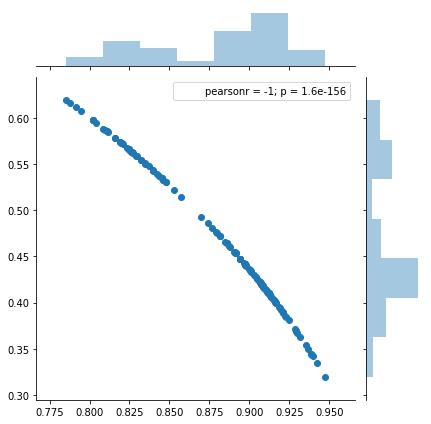

In [11]:

sns.jointplot(data3[:,0],data3[:,1])
plt.show()
